In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array 
from tensorflow import keras
import matplotlib.pyplot as plt


2022-12-02 09:15:19.944899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 09:15:20.676387: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-02 09:15:20.676411: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-02 09:15:22.655183: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
#dimensions of our images
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 1000
nb_validation_samples = 100
epochs = 50
batch_size = 100

In [4]:

if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width,img_height)
else:
	input_shape = (img_width,img_height, 3)

train_datagen = 	ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)


In [5]:

#This is the augmentation configuration we will use for testing:
#only rescaling
test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size= (img_width, img_height),
	batch_size=batch_size,
	shuffle=True,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width,img_height),
	batch_size=batch_size,
	class_mode='binary')


Found 21978 images belonging to 2 classes.
Found 3020 images belonging to 2 classes.


In [6]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Flatten())

model.add(Dense(512, activation ='relu'))
model.add(Dense(2, activation ='softmax')) # if activation is sigmoid change 2 -> 1

model.summary()
model.compile(loss='sparse_categorical_crossentropy', # if activation is sigmoid change loss to binary_crossentropy
	          optimizer='adam',
	          metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             


2022-12-02 09:15:29.895679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-12-02 09:15:29.895739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: shekhar
2022-12-02 09:15:29.895754: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: shekhar
2022-12-02 09:15:29.895906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 390.154.0
2022-12-02 09:15:29.895942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.154.0
2022-12-02 09:15:29.895950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 390.154.0
2022-12-02 09:15:29.896957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Li

                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3211776   
                                                                 
 dense_1 (

In [25]:

#This is the augmentation configuration we will use for training

history = model.fit(train_generator,
	steps_per_epoch= nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
10/10 [==============================] - 26s 2s/step - loss: 0.7910 - accuracy: 0.4880 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 2/50
10/10 [==============================] - 25s 2s/step - loss: 0.6914 - accuracy: 0.5200 - val_loss: 0.6865 - val_accuracy: 0.5600
Epoch 3/50
10/10 [==============================] - 28s 3s/step - loss: 0.6939 - accuracy: 0.5420 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 28s 3s/step - loss: 0.6940 - accuracy: 0.5120 - val_loss: 0.6917 - val_accuracy: 0.5200
Epoch 5/50
10/10 [==============================] - 29s 3s/step - loss: 0.6929 - accuracy: 0.4850 - val_loss: 0.6920 - val_accuracy: 0.5400
Epoch 6/50
10/10 [==============================] - 27s 3s/step - loss: 0.6922 - accuracy: 0.4900 - val_loss: 0.6918 - val_accuracy: 0.5500
Epoch 7/50
10/10 [==============================] - 26s 3s/step - loss: 0.6867 - accuracy: 0.5600 - val_loss: 0.7038 - val_accuracy: 0.4900
Epoch 8/50
10/10 [==

/home/shekhar/anaconda3/envs/ml/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


10/10 [==============================] - 27s 3s/step - loss: 0.5611 - accuracy: 0.7060 - val_loss: 0.5250 - val_accuracy: 0.7300
Epoch 27/50
10/10 [==============================] - 25s 2s/step - loss: 0.5552 - accuracy: 0.7150 - val_loss: 0.5886 - val_accuracy: 0.7200
Epoch 28/50
10/10 [==============================] - 25s 3s/step - loss: 0.5786 - accuracy: 0.6800 - val_loss: 0.4983 - val_accuracy: 0.7700
Epoch 29/50
10/10 [==============================] - 25s 2s/step - loss: 0.5165 - accuracy: 0.7580 - val_loss: 0.4937 - val_accuracy: 0.7300
Epoch 30/50
10/10 [==============================] - 26s 3s/step - loss: 0.5299 - accuracy: 0.7410 - val_loss: 0.5484 - val_accuracy: 0.7600
Epoch 31/50
10/10 [==============================] - 26s 3s/step - loss: 0.5295 - accuracy: 0.7480 - val_loss: 0.4974 - val_accuracy: 0.7400
Epoch 32/50
10/10 [==============================] - 26s 2s/step - loss: 0.5128 - accuracy: 0.7490 - val_loss: 0.3716 - val_accuracy: 0.8200
Epoch 33/50
10/10 [======

In [26]:
model.save('model/1')

INFO:tensorflow:Assets written to: model/1/assets


INFO:tensorflow:Assets written to: model/1/assets


In [27]:
model = keras.models.load_model('model/1')

In [41]:
img_pred = load_img('data/example/cat3.jpg',target_size=(150, 150))
img_pred = img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0 )

rslt = model.predict(img_pred)
print(rslt)

1/1 [==============================] - 0s 27ms/step
[[9.999584e-01 4.159059e-05]]


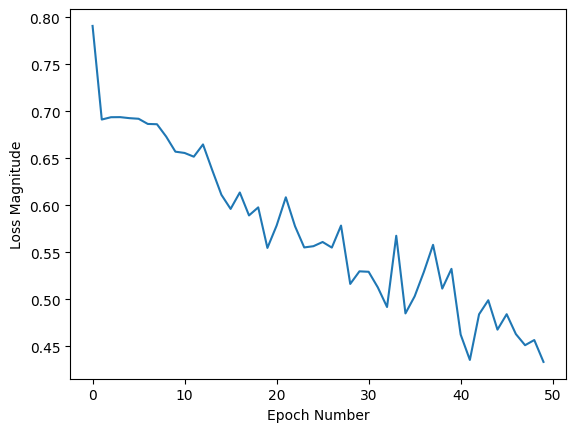

In [42]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

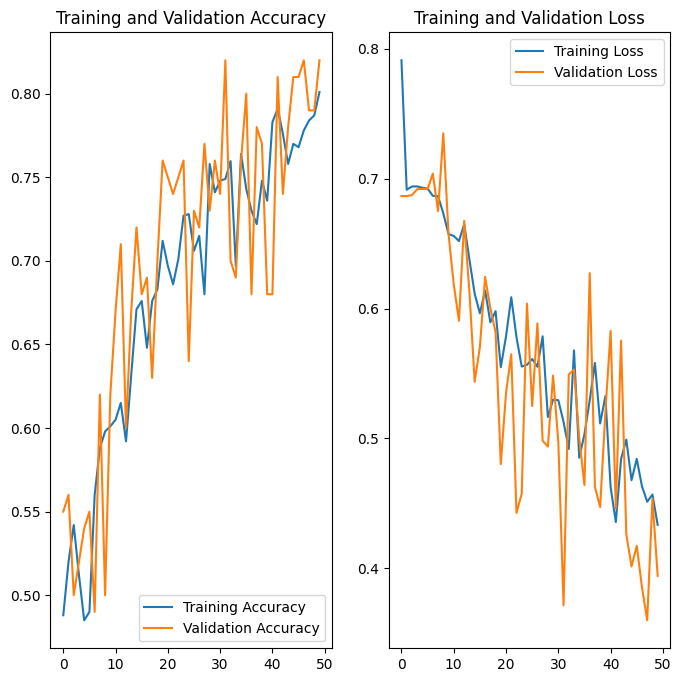

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./result.png')
plt.show()